In [77]:
import pandas as pd
import os
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.pyplot as plt
import fiona

%matplotlib inline

Read in cyclist crash data

In [276]:
df = pd.read_csv(r'C:\Users\new\Documents\cyclist_crashes.csv')

In [277]:
df

,CRASH_ID,CRASH_DATE,CRASH_TIME,SEVERITY,CRASH_TYPE,CYCLISTS,CYCLIST_CASUALTIES,REPORTED_LOCATION,LATITUDE,LONGITUDE,LOCATION_1
0,1131191,03-Mar-16,18:30,Property Damage Only,Other - Vehicle to Vehicle,1,0,GUNGAHLIN/KOSCIUSZKO INTERSECTION,-35.193327,149.127742,"(-35.193327, 149.127742)"
1,1131177,03-Mar-16,9:25,Property Damage Only,Other - Vehicle to Vehicle,1,0,COSSINGTON SMITH/ELLENBOROUGH (SW) INTERSECTION,-35.240485,149.125709,"(-35.240485, 149.125709)"
2,1131306,07-Mar-16,8:57,Property Damage Only,Other - Vehicle to Vehicle,1,0,BARRY/WATSON INTERSECTION,-35.275179,149.125714,"(-35.275179, 149.125714)"
3,1131444,09-Mar-16,17:40,Property Damage Only,Other - Vehicle to Vehicle,1,0,NORTHBOURNE AVENUE (ELOUERA/GOULD -> GIRRAHWEE...,-35.270939,149.130454,"(-35.270939, 149.130454)"
4,1131071,16-Mar-16,9:02,Injury,Right turn into oncoming vehicle,1,1,BENT/CONDAMINE INTERSECTION,-35.266172,149.125200,"(-35.266172, 149.1252)"
5,1131595,14-Mar-16,10:05,Injury,Other - Single Vehicle (On Road),1,1,BAILEY/NOVAR (SW) INTERSECTION,-35.301612,149.098193,"(-35.301612, 149.098193)"
6,1131601,15-Mar-16,8:45,Property Damage Only,Same direction side swipe,1,0,CANBERRA/STATE INTERSECTION,-35.312196,149.126137,"(-35.312196, 149.126137)"
7,1151533,09-Jan-17,9:45,Injury,Other - Single Vehicle (On Road),1,1,MORPHETT/NORTHBOURNE INTERSECTION,-35.253564,149.133260,"(-35.253564, 149.13326)"
8,1132053,25-Mar-16,21:00,Property Damage Only,Right angle collision,1,0,GORDON/MARCUS CLARKE INTERSECTION,-35.282689,149.123857,"(-35.282689, 149.123857)"
9,1132166,01-Apr-16,17:20,Injury,Other - Vehicle to Vehicle,1,1,LOWANNA STREET (DOORING -> COOLAC),-35.261831,149.133338,"(-35.261831, 149.133338)"


Convert LAT/LONGS into points:

In [278]:
geometry = [Point(xy) for xy in zip(df.LONGITUDE, df.LATITUDE)]
df = df.drop(['LONGITUDE', 'LATITUDE'], axis=1)
crs = {'init': 'epsg:32755'}
geo_df = GeoDataFrame(df, crs=crs, geometry=geometry)

In [279]:
geo_df.head()

,CRASH_ID,CRASH_DATE,CRASH_TIME,SEVERITY,CRASH_TYPE,CYCLISTS,CYCLIST_CASUALTIES,REPORTED_LOCATION,LOCATION_1,geometry
0,1131191,03-Mar-16,18:30,Property Damage Only,Other - Vehicle to Vehicle,1,0,GUNGAHLIN/KOSCIUSZKO INTERSECTION,"(-35.193327, 149.127742)",POINT (149.127742 -35.193327)
1,1131177,03-Mar-16,9:25,Property Damage Only,Other - Vehicle to Vehicle,1,0,COSSINGTON SMITH/ELLENBOROUGH (SW) INTERSECTION,"(-35.240485, 149.125709)",POINT (149.125709 -35.240485)
2,1131306,07-Mar-16,8:57,Property Damage Only,Other - Vehicle to Vehicle,1,0,BARRY/WATSON INTERSECTION,"(-35.275179, 149.125714)",POINT (149.125714 -35.275179)
3,1131444,09-Mar-16,17:40,Property Damage Only,Other - Vehicle to Vehicle,1,0,NORTHBOURNE AVENUE (ELOUERA/GOULD -> GIRRAHWEE...,"(-35.270939, 149.130454)",POINT (149.130454 -35.270939)
4,1131071,16-Mar-16,9:02,Injury,Right turn into oncoming vehicle,1,1,BENT/CONDAMINE INTERSECTION,"(-35.266172, 149.1252)",POINT (149.1252 -35.266172)


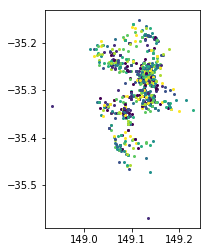

In [280]:
geo_df.plot()

In [281]:
df.columns

Index(['CRASH_ID', 'CRASH_DATE', 'CRASH_TIME', 'SEVERITY', 'CRASH_TYPE',
       'CYCLISTS', 'CYCLIST_CASUALTIES', 'REPORTED_LOCATION', 'LOCATION_1',
       'geometry'],
      dtype='object')

Group crashes by location:

In [282]:
tally = df.groupby('REPORTED_LOCATION').count()
tally.head()

,CRASH_ID,CRASH_DATE,CRASH_TIME,SEVERITY,CRASH_TYPE,CYCLISTS,CYCLIST_CASUALTIES,LOCATION_1,geometry
REPORTED_LOCATION,,,,,,,,,
A'BECKETT/KNOX (SW) INTERSECTION,1,1,1,1,1,1,1,1,1
ADELAIDE AVENUE (COTTEADELERM -> YARRA GLEN),2,2,2,2,2,2,2,2,2
ADELAIDE AVENUE (EMPIRE -> ADELWHOPESRM),1,1,1,1,1,1,1,1,1
ADELAIDE AVENUE (STATNADELWRM -> NATIONAL),1,1,1,1,1,1,1,1,1
ADELAIDE/ADELEHOPENRM INTERSECTION,1,1,1,1,1,1,1,1,1


In [283]:
tally = pd.DataFrame(df.groupby('REPORTED_LOCATION').count().loc[:,'CYCLISTS'])
tally 

,CYCLISTS
REPORTED_LOCATION,
A'BECKETT/KNOX (SW) INTERSECTION,1
ADELAIDE AVENUE (COTTEADELERM -> YARRA GLEN),2
ADELAIDE AVENUE (EMPIRE -> ADELWHOPESRM),1
ADELAIDE AVENUE (STATNADELWRM -> NATIONAL),1
ADELAIDE/ADELEHOPENRM INTERSECTION,1
ADELAIDE/ADELWKENTSRM/NOVASADELERM INTERSECTION,2
ADELAIDE/COTTEADELERM INTERSECTION,2
ADELWKENTSRM/KENT INTERSECTION,1
AIKMAN/GINNINDERRA INTERSECTION,1


Filter out locations with less than 3 crashes:

In [284]:
dangerzones = pd.DataFrame(tally[tally['CYCLISTS'] > 2].index)

In [285]:
dangerzones

,REPORTED_LOCATION
0,AINSLIE/LIMESTONE INTERSECTION
1,ALEXANDRINA/CORONATION/FLYNN INTERSECTION
2,ANTILL/MOUAT/NORTHBOURNE INTERSECTION
3,ATHLLON/BEASLEY (SW) INTERSECTION
4,ATHLLON/DRAKEFORD/ISABELLA INTERSECTION
5,ATHLLON/SULWOOD INTERSECTION
6,BARRY/BOLDREWOOD INTERSECTION
7,BARRY/COOYONG/NORTHBOURNE INTERSECTION
8,BARRY/MARCUS CLARKE INTERSECTION
9,BARRY/MCCAUGHEY/NORTH INTERSECTION


In [286]:
dangerzones.head()

,REPORTED_LOCATION
0,AINSLIE/LIMESTONE INTERSECTION
1,ALEXANDRINA/CORONATION/FLYNN INTERSECTION
2,ANTILL/MOUAT/NORTHBOURNE INTERSECTION
3,ATHLLON/BEASLEY (SW) INTERSECTION
4,ATHLLON/DRAKEFORD/ISABELLA INTERSECTION


In [287]:
geo_df.head()

,CRASH_ID,CRASH_DATE,CRASH_TIME,SEVERITY,CRASH_TYPE,CYCLISTS,CYCLIST_CASUALTIES,REPORTED_LOCATION,LOCATION_1,geometry
0,1131191,03-Mar-16,18:30,Property Damage Only,Other - Vehicle to Vehicle,1,0,GUNGAHLIN/KOSCIUSZKO INTERSECTION,"(-35.193327, 149.127742)",POINT (149.127742 -35.193327)
1,1131177,03-Mar-16,9:25,Property Damage Only,Other - Vehicle to Vehicle,1,0,COSSINGTON SMITH/ELLENBOROUGH (SW) INTERSECTION,"(-35.240485, 149.125709)",POINT (149.125709 -35.240485)
2,1131306,07-Mar-16,8:57,Property Damage Only,Other - Vehicle to Vehicle,1,0,BARRY/WATSON INTERSECTION,"(-35.275179, 149.125714)",POINT (149.125714 -35.275179)
3,1131444,09-Mar-16,17:40,Property Damage Only,Other - Vehicle to Vehicle,1,0,NORTHBOURNE AVENUE (ELOUERA/GOULD -> GIRRAHWEE...,"(-35.270939, 149.130454)",POINT (149.130454 -35.270939)
4,1131071,16-Mar-16,9:02,Injury,Right turn into oncoming vehicle,1,1,BENT/CONDAMINE INTERSECTION,"(-35.266172, 149.1252)",POINT (149.1252 -35.266172)


Filter so only the dangerzones are left in our original dataframe:

In [288]:
test = geo_df['REPORTED_LOCATION'].isin(dangerzones['REPORTED_LOCATION'])

In [289]:
dangerzone_hits = geo_df[test]

In [290]:
dangerzone_hits

,CRASH_ID,CRASH_DATE,CRASH_TIME,SEVERITY,CRASH_TYPE,CYCLISTS,CYCLIST_CASUALTIES,REPORTED_LOCATION,LOCATION_1,geometry
2,1131306,07-Mar-16,8:57,Property Damage Only,Other - Vehicle to Vehicle,1,0,BARRY/WATSON INTERSECTION,"(-35.275179, 149.125714)",POINT (149.125714 -35.275179)
3,1131444,09-Mar-16,17:40,Property Damage Only,Other - Vehicle to Vehicle,1,0,NORTHBOURNE AVENUE (ELOUERA/GOULD -> GIRRAHWEE...,"(-35.270939, 149.130454)",POINT (149.130454 -35.270939)
7,1151533,09-Jan-17,9:45,Injury,Other - Single Vehicle (On Road),1,1,MORPHETT/NORTHBOURNE INTERSECTION,"(-35.253564, 149.13326)",POINT (149.13326 -35.253564)
8,1132053,25-Mar-16,21:00,Property Damage Only,Right angle collision,1,0,GORDON/MARCUS CLARKE INTERSECTION,"(-35.282689, 149.123857)",POINT (149.123857 -35.282689)
11,1132462,08-Apr-16,7:15,Property Damage Only,Right angle collision,1,0,MELROSE/THEODORE INTERSECTION,"(-35.338437, 149.08365)",POINT (149.08365 -35.338437)
16,1132851,06-Apr-16,15:30,Injury,Same direction side swipe,1,1,LONDON CIRCUIT (EDINBURGH -> COMMNLONDWRM),"(-35.283816, 149.126354)",POINT (149.126354 -35.28381599999999)
18,1133256,06-Apr-16,15:30,Property Damage Only,Same direction side swipe,1,0,BARRY/COOYONG/NORTHBOURNE INTERSECTION,"(-35.275762, 149.129574)",POINT (149.129574 -35.275762)
22,1133917,29-Apr-16,8:58,Injury,Other - Vehicle to Vehicle,1,1,BELCONNEN/BENJAMIN INTERSECTION,"(-35.247754, 149.067484)",POINT (149.067484 -35.247754)
24,1134088,19-Apr-16,17:10,Property Damage Only,Same direction side swipe,1,0,NORTHBOURNE AVENUE (BUNDA/RUDD -> BARRY/COOYONG),"(-35.276646, 149.129532)",POINT (149.129532 -35.276646)
26,1134298,22-Apr-16,14:00,Property Damage Only,Other - Vehicle to Vehicle,1,0,BARRY/MOORE INTERSECTION,"(-35.275739, 149.128276)",POINT (149.128276 -35.275739)


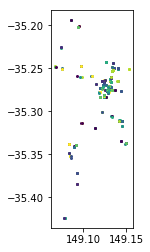

In [291]:
dangerzone_hits.plot()

In [312]:
polygon_df = dangerzone_hits[['REPORTED_LOCATION', 'SEVERITY', 'CYCLISTS', 'CRASH_DATE', 'CRASH_TIME', 'geometry']].sort_values('REPORTED_LOCATION')

In [313]:
polygon_df.head()

,REPORTED_LOCATION,SEVERITY,CYCLISTS,CRASH_DATE,CRASH_TIME,geometry
381,AINSLIE/LIMESTONE INTERSECTION,Property Damage Only,1,27-Mar-14,18:30,POINT (149.143722 -35.276175)
1030,AINSLIE/LIMESTONE INTERSECTION,Property Damage Only,1,15-Nov-16,17:30,POINT (149.143848 -35.276403)
481,AINSLIE/LIMESTONE INTERSECTION,Property Damage Only,1,04-Sep-13,8:20,POINT (149.14379 -35.2763)
924,ALEXANDRINA/CORONATION/FLYNN INTERSECTION,Injury,1,06-Nov-12,12:20,POINT (149.122262 -35.300487)
1091,ALEXANDRINA/CORONATION/FLYNN INTERSECTION,Property Damage Only,1,27-May-17,11:00,POINT (149.122097 -35.300368)


In [314]:
type(polygon_df)

geopandas.geodataframe.GeoDataFrame

In [315]:
polygon_df.to_file('crash_all_data')

Attempt to buffer all the points to create dataframes

Dissolve all points, then buffer them with tiny polygons, which we can then dissolve, thus making everything a polygon

In [308]:
buffer_geo = GeoDataFrame(polygon_df.dissolve('REPORTED_LOCATION').buffer(0.0001), crs = crs)

In [309]:
type(buffer_geo)

geopandas.geodataframe.GeoDataFrame

In [310]:
buffer_geo

,0
REPORTED_LOCATION,
AINSLIE/LIMESTONE INTERSECTION,POLYGON ((149.1436942925883 -35.27627102494088...
ALEXANDRINA/CORONATION/FLYNN INTERSECTION,"(POLYGON ((149.122362 -35.300487, 149.12236151..."
ANTILL/MOUAT/NORTHBOURNE INTERSECTION,POLYGON ((149.1340183624033 -35.24829026155257...
ATHLLON/BEASLEY (SW) INTERSECTION,"POLYGON ((149.092995 -35.371915, 149.092994518..."
ATHLLON/DRAKEFORD/ISABELLA INTERSECTION,(POLYGON ((149.0784473044783 -35.4241372107507...
ATHLLON/SULWOOD INTERSECTION,"(POLYGON ((149.093174 -35.384319, 149.09317351..."
BARRY/BOLDREWOOD INTERSECTION,"POLYGON ((149.1202011580452 -35.2729357829154,..."
BARRY/COOYONG/NORTHBOURNE INTERSECTION,POLYGON ((149.1295212461483 -35.27584682711763...
BARRY/MARCUS CLARKE INTERSECTION,POLYGON ((149.1267075348974 -35.27555153500933...


In [297]:
buffer_geo.columns = ['geometry']

In [300]:
buffer_geo

,geometry
REPORTED_LOCATION,
AINSLIE/LIMESTONE INTERSECTION,POLYGON ((149.1436942925883 -35.27627102494088...
ALEXANDRINA/CORONATION/FLYNN INTERSECTION,"(POLYGON ((149.122362 -35.300487, 149.12236151..."
ANTILL/MOUAT/NORTHBOURNE INTERSECTION,POLYGON ((149.1340183624033 -35.24829026155257...
ATHLLON/BEASLEY (SW) INTERSECTION,"POLYGON ((149.092995 -35.371915, 149.092994518..."
ATHLLON/DRAKEFORD/ISABELLA INTERSECTION,(POLYGON ((149.0784473044783 -35.4241372107507...
ATHLLON/SULWOOD INTERSECTION,"(POLYGON ((149.093174 -35.384319, 149.09317351..."
BARRY/BOLDREWOOD INTERSECTION,"POLYGON ((149.1202011580452 -35.2729357829154,..."
BARRY/COOYONG/NORTHBOURNE INTERSECTION,POLYGON ((149.1295212461483 -35.27584682711763...
BARRY/MARCUS CLARKE INTERSECTION,POLYGON ((149.1267075348974 -35.27555153500933...


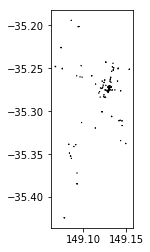

In [301]:
buffer_geo.plot()

In [302]:
type(buffer_geo)

geopandas.geodataframe.GeoDataFrame

In [303]:
buffer_geo.to_file('crashes2')

In [273]:
type(buffer_geo)

list

In [272]:
buffer_geo.columns = ['geometry']

AttributeError: 'list' object has no attribute 'columns'